# LEAP (Literacy Engagement and Assessment Platform): A Technological Approach to Literacy Improvement of Filipino Youth


**Jorelle Cybee Lenar, Janine Lumbang, Kim Audrey Magan, Frances Lorraine Montemayor**


---

The following are the codes that were used by the researchers to generate the data needed to visualize results and simulate a program. It also includes a sample of the simulation application.

## I. Data Generation Codes:

### Initialize the necessary libraries and constants

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(3000)

# Constants
howMany = 10
weeks = 11 # given the firts week is zero
daily_speed_growth_rate = 0.05  # 5% improvement per week
daily_comprehension_growth_rate = 0.03  # 3% improvement per week
sporadic_speed_growth_rate = 0.02  # 2% improvement per week
sporadic_comprehension_growth_rate = 0.01  # 1% improvement per week

### Generate the data

In [24]:
# Have dataframes for improvements from first week to last both in daily and sporadic
daily_weeklyImprovementsSpeed_df = pd.DataFrame()
daily_weeklyImprovementsComprehension_df = pd.DataFrame()
sporadic_weeklyImprovementsSpeed_df = pd.DataFrame()
sporadic_weeklyImprovementsComprehension_df = pd.DataFrame()


daily_weeklyImprovementsSpeed_df['habit'] = np.full(howMany * 6, "Daily")
daily_weeklyImprovementsComprehension_df['habit'] = np.full(60, "Daily")
sporadic_weeklyImprovementsSpeed_df['habit'] = np.full(60, "Sporadic")
sporadic_weeklyImprovementsComprehension_df['habit'] = np.full(60, "Sporadic")


# Dataframe that has the daily and sporadic data
sporadicDf = pd.DataFrame()
dailyDf = pd.DataFrame()
frustrationInit = ["Frustration I", "Frustration II", "Frustration III",\
                   "Frustration IV", "Frustration V", "Frustration VI"] * howMany


# Lists that will contain the data for daily and sporadic dataframes
daily_wpmInit = []
daily_testInit = []
daily_frustrationFinal = []
sporadic_wpmInit = []
sporadic_testInit = []
sporadic_frustrationFinal = []

for i in frustrationInit:
    if (i == "Frustration I"): 
        daily_wpmInit.append(np.random.randint(25, 31))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(25, 31))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration II"):
        daily_wpmInit.append(np.random.randint(31, 61))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(31, 61))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration III"):
        daily_wpmInit.append(np.random.randint(61, 91))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(61, 91))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration IV"):
        daily_wpmInit.append(np.random.randint(91, 111))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(91, 111))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    elif (i == "Frustration V"):
        daily_wpmInit.append(np.random.randint(111, 141))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(111, 141))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
    else:
        daily_wpmInit.append(np.random.randint(141, 161))
        daily_testInit.append(round(np.random.uniform(0.01, 0.75), 2))
        sporadic_wpmInit.append(np.random.randint(141, 161))
        sporadic_testInit.append(round(np.random.uniform(0.01, 0.75), 2))

dailyDf['habit'] = np.full(len(frustrationInit), "Daily")
dailyDf['initial_wpm'] = daily_wpmInit
dailyDf['initial_score'] = daily_testInit
dailyDf['initial_reading_lvl'] = frustrationInit

sporadicDf['habit'] = np.full(len(frustrationInit), "Sporadic")
sporadicDf['initial_wpm'] = sporadic_wpmInit
sporadicDf['initial_score'] = sporadic_testInit
sporadicDf['initial_reading_lvl'] = frustrationInit

# This is just to store the mean of the improvments each week for graphing
daily_speed_improvements = []
daily_comprehension_improvements = []
sporadic_speed_improvements = []
sporadic_comprehension_improvements = []


for week in range(weeks):
    daily_weeklyImprovementsSpeed_df["Week_" + str(week)] = (dailyDf['initial_wpm'] * (1 + daily_speed_growth_rate * week)).clip(upper=250)
    daily_speed_improvements.append(daily_weeklyImprovementsSpeed_df["Week_" + str(week)].mean()) # this will be our y
    
    daily_weeklyImprovementsComprehension_df["Week_" + str(week)] = (dailyDf['initial_score'] * (1 + daily_comprehension_growth_rate * week)).clip(upper=1)
    daily_comprehension_improvements.append(daily_weeklyImprovementsComprehension_df["Week_" + str(week)].mean()) # this will be our y

    sporadic_weeklyImprovementsSpeed_df["Week_" + str(week)] = (sporadicDf['initial_wpm'] * (1 + sporadic_speed_growth_rate * week)).clip(upper=250)
    sporadic_speed_improvements.append(sporadic_weeklyImprovementsSpeed_df["Week_" + str(week)].mean()) # this will be our y
    
    sporadic_weeklyImprovementsComprehension_df["Week_" + str(week)] = (sporadicDf['initial_score'] * (1 + sporadic_comprehension_growth_rate * week)).clip(upper=1)
    sporadic_comprehension_improvements.append(sporadic_weeklyImprovementsComprehension_df["Week_" + str(week)].mean())


# Getting the final improvement # must have a threshold
dailyDf['final_wpm'] = daily_weeklyImprovementsSpeed_df["Week_10"] 
dailyDf['final_score'] = daily_weeklyImprovementsComprehension_df["Week_10"] 
sporadicDf['final_wpm'] = sporadic_weeklyImprovementsSpeed_df["Week_10"] 
sporadicDf['final_score'] = sporadic_weeklyImprovementsComprehension_df["Week_10"] 

modsimDf = pd.concat([dailyDf, sporadicDf], axis=0)
modsimDf = modsimDf.reset_index(drop=True)
for i in range(len(modsimDf['final_score'])):  # Loop over the actual length of testFinal
    if modsimDf['final_score'][i] < 0.75:
            if modsimDf['final_wpm'][i] < 31:
                daily_frustrationFinal.append("Frustration I")
            elif 31 <= modsimDf['final_wpm'][i] < 61:
                daily_frustrationFinal.append("Frustration II")
            elif 61 <= modsimDf['final_wpm'][i] < 91:
                daily_frustrationFinal.append("Frustration III")
            elif 91 <= modsimDf['final_wpm'][i] < 111:
                daily_frustrationFinal.append("Frustration IV")
            elif 111 <= modsimDf['final_wpm'][i] < 141:
                daily_frustrationFinal.append("Frustration V")
            else:  # 141 <= modsimDf['final_wpm'][i] < 161
                daily_frustrationFinal.append("Frustration VI")
    
    elif 0.75 <= modsimDf['final_score'][i] <= 0.89:  # Ensure coverage for this range
            daily_frustrationFinal.append(
                np.random.choice([
                    "Instructional I", "Instructional II",
                    "Instructional III", "Instructional IV",
                    "Instructional V", "Instructional VI"
                ])
            )
        
    else:  # testFinal[i] > 0.89
            if 70 <= modsimDf['final_wpm'][i] < 100:
                daily_frustrationFinal.append("Independent I")
            elif 100 <= modsimDf['final_wpm'][i] < 120:
                daily_frustrationFinal.append("Independent II")
            elif 120 <= modsimDf['final_wpm'][i] < 140:
                daily_frustrationFinal.append("Independent III")
            elif 140 <= modsimDf['final_wpm'][i] < 170:
                daily_frustrationFinal.append("Independent IV")
            elif 170 <= modsimDf['final_wpm'][i] < 190:
                daily_frustrationFinal.append("Independent V")
            else:  # modsimDf['final_wpm'][i]
                daily_frustrationFinal.append("Independent VI")

modsimDf['final_reading_lvl'] = daily_frustrationFinal

# The following are the dataframes for weekly progressions:
speedImprovementDf = pd.concat([daily_weeklyImprovementsSpeed_df, sporadic_weeklyImprovementsSpeed_df], axis=0)
speedImprovementDf = speedImprovementDf.reset_index(drop=True)
comprehensionImprovementDf = pd.concat([daily_weeklyImprovementsComprehension_df, sporadic_weeklyImprovementsComprehension_df], axis=0)
comprehensionImprovementDf = comprehensionImprovementDf.reset_index(drop=True)

In [25]:
modsimDf

,habit,initial_wpm,initial_score,initial_reading_lvl,final_wpm,final_score,final_reading_lvl
0,Daily,29,0.20,Frustration I,43.5,0.260,Frustration II
1,Daily,57,0.01,Frustration II,85.5,0.013,Frustration III
2,Daily,69,0.75,Frustration III,103.5,0.975,Independent II
3,Daily,109,0.31,Frustration IV,163.5,0.403,Frustration VI
4,Daily,122,0.09,Frustration V,183.0,0.117,Frustration VI
...,...,...,...,...,...,...,...
115,Sporadic,38,0.72,Frustration II,45.6,0.792,Instructional II
116,Sporadic,87,0.51,Frustration III,104.4,0.561,Frustration IV
117,Sporadic,96,0.05,Frustration IV,115.2,0.055,Frustration V
118,Sporadic,125,0.13,Frustration V,150.0,0.143,Frustration VI


### Convert the dataframe to CSV

In [32]:
modsimDf.to_csv('LEAP1.csv', index=False)
speedImprovementDf.to_csv('LEAP2.csv', index=False)
comprehensionImprovementDf.to_csv('LEAP3.csv', index=False)

## II. Data Visualization

### Line Charts
The following charts follow the trends of both the progression of reading speed and comprehension scores of the students with either daily or sporadic habit.

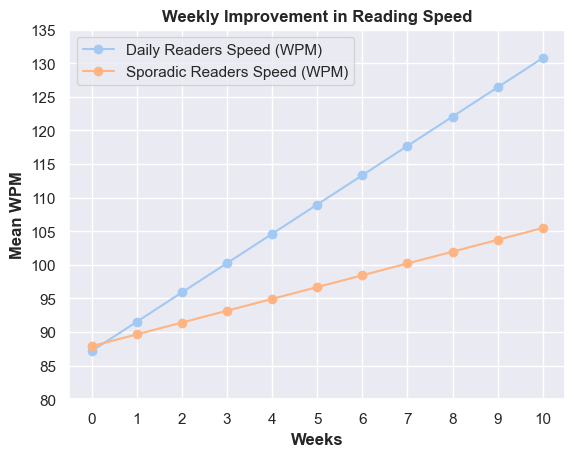

In [27]:
dailyMeanWPM = list(speedImprovementDf.groupby('habit').get_group('Daily').describe().iloc[1, :])
sporadicMeanWPM = list(speedImprovementDf.groupby('habit').get_group('Sporadic').describe().iloc[1, :])
weekList = [i for i in range (11)]

plt.plot(weekList, dailyMeanWPM, label="Daily Readers Speed (WPM)", marker="o")
plt.plot(weekList, sporadicMeanWPM, label="Sporadic Readers Speed (WPM)", marker="o")

# Add titles and labels
sns.set_theme(style="darkgrid")
sns.set_palette("pastel")
plt.title("Weekly Improvement in Reading Speed", fontsize=12, fontweight="bold")
plt.xlabel("Weeks", fontsize=12, fontweight="bold")
plt.ylabel("Mean WPM", fontsize=12, fontweight="bold")
plt.xticks(np.arange(min(weekList), max(weekList)+1, 1.0))
plt.yticks(np.arange(80, max(max(dailyMeanWPM), max(sporadicMeanWPM)) + 5,  5))
plt.legend()  # Show the legend for the two lines
plt.grid(True)  # Add a grid for better readability
plt.show()

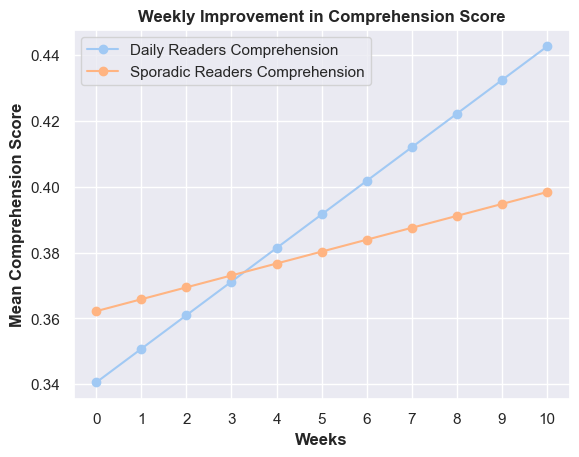

In [28]:
dailyMean = list(comprehensionImprovementDf.groupby('habit').get_group('Daily').describe().iloc[1, :])
sporadicMean = list(comprehensionImprovementDf.groupby('habit').get_group('Sporadic').describe().iloc[1, :])
weekList = [i for i in range (11)]

plt.plot(weekList, dailyMean, label="Daily Readers Comprehension", marker="o")
plt.plot(weekList, sporadicMean, label="Sporadic Readers Comprehension", marker="o")

# Add titles and labels
plt.title("Weekly Improvement in Comprehension Score", fontsize=12, fontweight="bold")
plt.xlabel("Weeks", fontsize=12, fontweight="bold")
plt.xticks(np.arange(min(weekList), max(weekList)+1, 1.0))
plt.ylabel("Mean Comprehension Score", fontsize=12, fontweight="bold")
plt.legend()  # Show the legend for the two lines
plt.grid(True)  # Add a grid for better readability
plt.show()

### Scatter Plots

The following charts show the relationship of the initial and final reading speed and the initial and final comprehension scores.

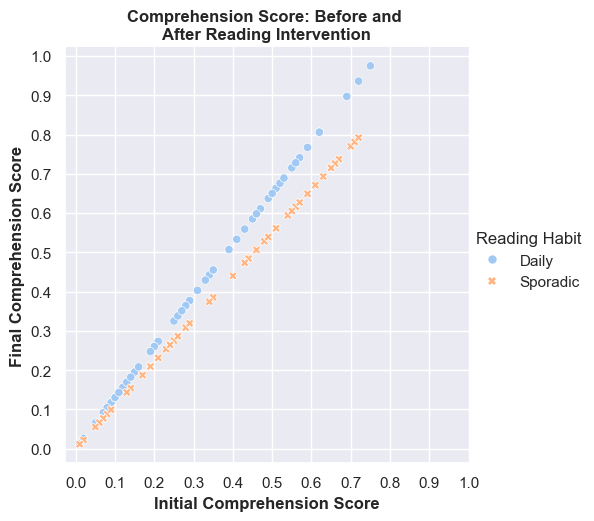

In [29]:
engineeredModsim = modsimDf.copy()
engineeredModsim = engineeredModsim.rename(columns={'habit': 'Reading Habit'})
sns.relplot(kind = 'scatter', data = engineeredModsim, x = 'initial_score', y = 'final_score', hue = 'Reading Habit', style= 'Reading Habit')
plt.xlabel('Initial Comprehension Score', fontsize=12, fontweight="bold")
plt.ylabel('Final Comprehension Score', fontsize=12, fontweight="bold")
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.title('Comprehension Score: Before and \nAfter Reading Intervention', fontsize=12, fontweight="bold")
plt.show()

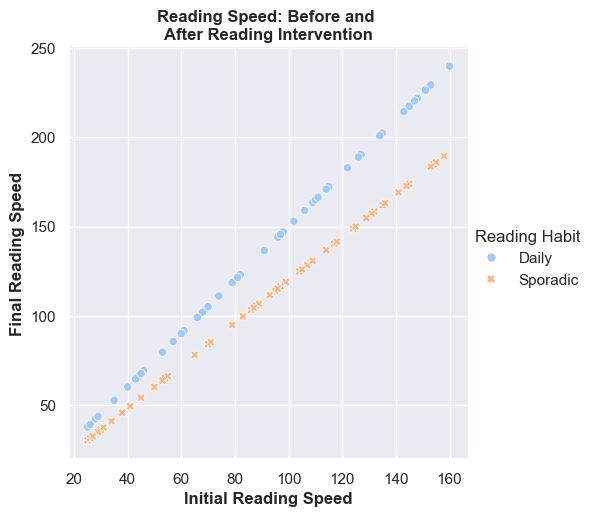

In [30]:
sns.relplot(kind = 'scatter', data = engineeredModsim, x = 'initial_wpm', y = 'final_wpm', hue = 'Reading Habit', style= 'Reading Habit')
plt.xlabel('Initial Reading Speed', fontsize=12, fontweight="bold")
plt.ylabel('Final Reading Speed', fontsize=12, fontweight="bold")
plt.title('Reading Speed: Before and \nAfter Reading Intervention', fontweight = 'bold')
plt.show()

## III. Simulation

**Caveat:**

- Simulator must be able to run python in their devices with Matplotlib and NumPy installed.
- To run the program, the simulator must provide two inputs: comprehension score and reading speed.
- Comprehension score must be in decimal representation of a percentage.
- Reading speed must be between 25 and 250, inclusive.

Please input scores in decimal representation of percentage.
Please input speed between 25 and 250, inclusive.


Please input the initial comprehension score:  0.60
Please input the reading speed (WPM):  79


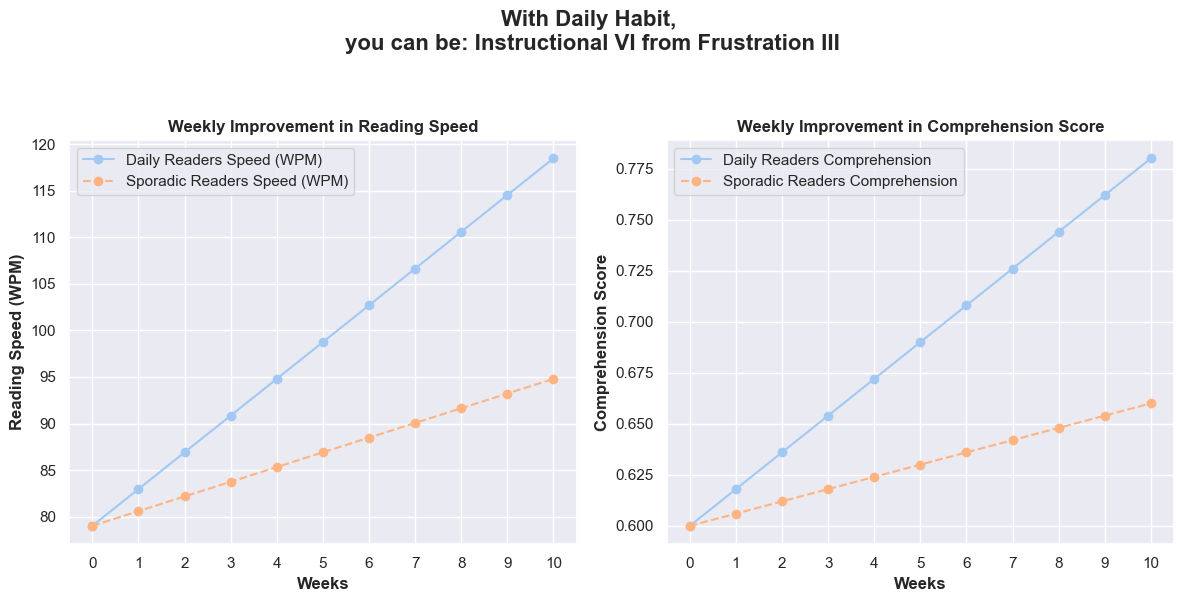

In [31]:
import matplotlib.pyplot as plt
import numpy as np


daily_speed_growth_rate = 0.05  # 5% improvement per week
daily_comprehension_growth_rate = 0.03  # 3% improvement per week
sporadic_speed_growth_rate = 0.02  # 2% improvement per week
sporadic_comprehension_growth_rate = 0.01  # 1% improvement per week
weeks = list(range(11))

print("Please input scores in decimal representation of percentage.")
print("Please input speed between 25 and 250, inclusive.")


try:
    score = float(input("Please input the initial comprehension score: "))
    speed = float(input("Please input the reading speed (WPM): "))
except:
    print("Please enter the right format.")
    exit()

if (score < 0.1 and score > 1.0):
    print("Please enter the right values1.")
    exit()
if (speed < 25 and speed > 250):
    print("Please enter the right values2.")
    exit()

def simulate(score, speed):
   
    daily_comprehension = [min(score * (1 + daily_comprehension_growth_rate * i), 1) for i in range(11)] 
    daily_speed = [speed * (1 + daily_speed_growth_rate * i) for i in range(11)]
    sporadic_comprehension = [min(score * (1 + sporadic_comprehension_growth_rate * i), 1) for i in range(11)] 
    sporadic_speed = [speed * (1 + sporadic_speed_growth_rate * i) for i in range(11)]

    if score < 0.75:
            if speed < 31:
                note1 = "Frustration I"
            elif 31 <= speed < 61:
                note1 = "Frustration II"
            elif 61 <= speed < 91:
                note1 = "Frustration III"
            elif 91 <= speed < 111:
                note1 = "Frustration IV"
            elif 111 <= speed < 141:
                note1 = "Frustration V"
            else:  
                note1 = "Frustration VI"
    
    elif 0.75 <= score <= 0.89:  # Ensure coverage for this range
            note1 = np.random.choice([
                    "Instructional I", "Instructional II",
                    "Instructional III", "Instructional IV",
                    "Instructional V", "Instructional VI"
                ])
        
    else:  
            if 70 <= speed < 100:
                note1 = "Independent I"
            elif 100 <= speed < 120:
                note1 = "Independent II"
            elif 120 <= speed < 140:
                note1 = "Independent III"
            elif 140 <= speed < 170:
                note1 = "Independent IV"
            elif 170 <= speed < 190:
                note1 = "Independent V"
            else:  # modsimDf['final_wpm'][i]
                note1 = "Independent VI"

    if daily_comprehension[-1] < 0.75:
            if daily_speed[-1] < 31:
                note = "Frustration I"
            elif 31 <= daily_speed[-1] < 61:
                note = "Frustration II"
            elif 61 <= daily_speed[-1] < 91:
                note = "Frustration III"
            elif 91 <= daily_speed[-1] < 111:
                note = "Frustration IV"
            elif 111 <= daily_speed[-1] < 141:
                note = "Frustration V"
            else:  
                note = "Frustration VI"
    
    elif 0.75 <= daily_comprehension[-1] <= 0.89:  # Ensure coverage for this range
            note = np.random.choice([
                    "Instructional I", "Instructional II",
                    "Instructional III", "Instructional IV",
                    "Instructional V", "Instructional VI"
                ])
        
    else:  
            if 70 <= daily_speed[-1] < 100:
                note = "Independent I"
            elif 100 <= daily_speed[-1] < 120:
                note = "Independent II"
            elif 120 <= daily_speed[-1] < 140:
                note = "Independent III"
            elif 140 <= daily_speed[-1] < 170:
                note = "Independent IV"
            elif 170 <= daily_speed[-1] < 190:
                note = "Independent V"
            else:  # modsimDf['final_wpm'][i]
                note = "Independent VI"


    # plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Speed
    ax1.plot(weeks, daily_speed, label="Daily Readers Speed (WPM)", marker="o")
    ax1.plot(weeks, sporadic_speed, label="Sporadic Readers Speed (WPM)", marker="o", linestyle='--')
    ax1.set_title("Weekly Improvement in Reading Speed", fontsize=12, fontweight="bold")
    ax1.set_xlabel("Weeks", fontsize=12, fontweight="bold")
    ax1.set_ylabel("Reading Speed (WPM)", fontsize=12, fontweight="bold")
    ax1.set_xticks(np.arange(min(weeks), max(weeks) + 1, 1.0))
    ax1.legend()
    ax1.grid(True)

    # Comprehension
    ax2.plot(weeks, daily_comprehension, label="Daily Readers Comprehension", marker="o")
    ax2.plot(weeks, sporadic_comprehension, label="Sporadic Readers Comprehension", marker="o", linestyle='--')
    ax2.set_title("Weekly Improvement in Comprehension Score", fontsize=12, fontweight="bold")
    ax2.set_xlabel("Weeks", fontsize=12, fontweight="bold")
    ax2.set_ylabel("Comprehension Score", fontsize=12, fontweight="bold")
    ax2.set_xticks(np.arange(min(weeks), max(weeks) + 1, 1.0))
    ax2.legend()
    ax2.grid(True)

   
    fig.suptitle("With Daily Habit, \nyou can be: " +  note + " from " + note1, fontsize=16, fontweight="bold",y=1)


    # Show the plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()


simulate(score, speed)

### END